### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df=application_df.drop(columns=["EIN","NAME"],axis=1)


In [3]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
application_df.dropna()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column.nunique show each column how many unique values they have 
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
applicationtype_count= application_df["APPLICATION_TYPE"].value_counts()
applicationtype_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

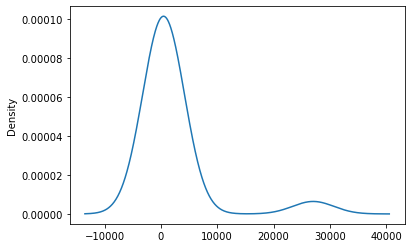

In [7]:
# Visualize the value counts of APPLICATION_TYPE
applicationtype_count.plot.density()

Text(0, 0.5, 'Count')

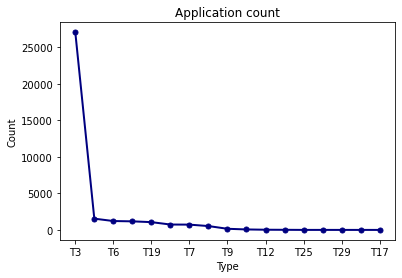

In [8]:
ax = applicationtype_count.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Application count')
ax.set_xlabel("Type")
ax.set_ylabel("Count")

In [9]:
# Determine which values to replace if counts are less than ...?
replace_application = list(applicationtype_count[applicationtype_count < 500].index)
replace_application

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [10]:
applicationtype_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
replace_class_count = application_df["CLASSIFICATION"].value_counts()
replace_class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [13]:
# Look at CLASSIFICATION value counts for binnin

replace_class_list = list(replace_class_count[replace_class_count < 500].index)
replace_class_list

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [14]:
for classification in replace_class_list:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(classification,'OTHER')

application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
OTHER     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [15]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [16]:
# Generate our categorical variable lists

# app_cat = application_df[['APPLICATION_TYPE',
#  'AFFILIATION',
#  'CLASSIFICATION',
#  'USE_CASE',
#  'ORGANIZATION',
#  'INCOME_AMT',
#  'SPECIAL_CONSIDERATIONS']]

app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encoded_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encoded_df.columns = enc.get_feature_names(app_cat)
encoded_df.head()

C:\Users\Sangeetha\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encoded_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

C:\Users\Sangeetha\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

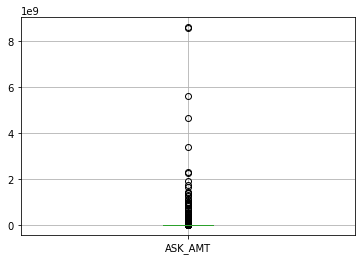

In [19]:
#effort to increase accuracy dropping some features 
application_df.boxplot(column=['ASK_AMT'])


In [20]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values #target
X = application_df.drop(["IS_SUCCESSFUL"],axis=1).values # all features 





In [21]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687],
       [ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687],
       [ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687],
       ...,
       [ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687],
       [ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687],
       [ 0.01079982, -0.02957055, -0.08940766, ..., -0.07529085,
         0.02925687, -0.02925687]])

### Deliverable 2: Compile, Train and Evaluate the Model

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                450       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 661us/step - loss: 0.5964 - accuracy: 0.7001
Epoch 2/100
804/804 [==============================] - 1s 663us/step - loss: 0.5627 - accuracy: 0.7250
Epoch 3/100
804/804 [==============================] - 1s 665us/step - loss: 0.5578 - accuracy: 0.7261
Epoch 4/100
804/804 [==============================] - 1s 671us/step - loss: 0.5555 - accuracy: 0.7285
Epoch 5/100
804/804 [==============================] - 1s 659us/step - loss: 0.5536 - accuracy: 0.7294
Epoch 6/100
804/804 [==============================] - 1s 662us/step - loss: 0.5525 - accuracy: 0.7294
Epoch 7/100
804/804 [==============================] - 1s 661us/step - loss: 0.5519 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 1s 655us/step - loss: 0.5507 - accuracy: 0.7309
Epoch 9/100
804/804 [==============================] - 1s 660us/step - loss: 0.5496 - accuracy: 0.7298
Epoch 10/100
804/804 [==============================] - 1s 656us/step - l

804/804 [==============================] - 1s 669us/step - loss: 0.5413 - accuracy: 0.7360
Epoch 80/100
804/804 [==============================] - 1s 752us/step - loss: 0.5413 - accuracy: 0.7357
Epoch 81/100
804/804 [==============================] - 1s 688us/step - loss: 0.5415 - accuracy: 0.7364
Epoch 82/100
804/804 [==============================] - 1s 657us/step - loss: 0.5415 - accuracy: 0.7358
Epoch 83/100
804/804 [==============================] - 1s 686us/step - loss: 0.5413 - accuracy: 0.7355
Epoch 84/100
804/804 [==============================] - 1s 738us/step - loss: 0.5410 - accuracy: 0.7357
Epoch 85/100
804/804 [==============================] - 1s 681us/step - loss: 0.5410 - accuracy: 0.7369
Epoch 86/100
804/804 [==============================] - 1s 716us/step - loss: 0.5412 - accuracy: 0.7359
Epoch 87/100
804/804 [==============================] - 1s 686us/step - loss: 0.5411 - accuracy: 0.7366
Epoch 88/100
804/804 [==============================] - 1s 714us/step - loss:

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5523 - accuracy: 0.7306 - 216ms/epoch - 806us/step
Loss: 0.5523388981819153, Accuracy: 0.7306122183799744


In [28]:
# Export our model to HDF5 file
nn.save("data/AlphabetSoupCharity.h5")

# REDUCED THE DATAFRAME TO INCREASE ACCURACY OF THE MODEL 


In [29]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
application_df.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_OTHER',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_

In [31]:
selected_columns  = application_df[['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_OTHER',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust','SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y' ]]
application_df2 = selected_columns.copy()
application_df2.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [32]:
# Split our preprocessed data into our features and target arrays
y = application_df2["IS_SUCCESSFUL"].values #target
X = application_df2.drop(["IS_SUCCESSFUL"],axis=1).values # all features 


In [33]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                360       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 724us/step - loss: 0.6000 - accuracy: 0.6981
Epoch 2/100
804/804 [==============================] - 1s 766us/step - loss: 0.5672 - accuracy: 0.7210
Epoch 3/100
804/804 [==============================] - 1s 684us/step - loss: 0.5631 - accuracy: 0.7242
Epoch 4/100
804/804 [==============================] - 1s 711us/step - loss: 0.5611 - accuracy: 0.7255
Epoch 5/100
804/804 [==============================] - 1s 740us/step - loss: 0.5603 - accuracy: 0.7261
Epoch 6/100
804/804 [==============================] - 1s 719us/step - loss: 0.5593 - accuracy: 0.7254
Epoch 7/100
804/804 [==============================] - 1s 758us/step - loss: 0.5586 - accuracy: 0.7264
Epoch 8/100
804/804 [==============================] - 1s 745us/step - loss: 0.5583 - accuracy: 0.7266
Epoch 9/100
804/804 [==============================] - 1s 744us/step - loss: 0.5580 - accuracy: 0.7278
Epoch 10/100
804/804 [==============================] - 1s 739us/step - l

804/804 [==============================] - 1s 735us/step - loss: 0.5495 - accuracy: 0.7322
Epoch 80/100
804/804 [==============================] - 1s 758us/step - loss: 0.5500 - accuracy: 0.7316
Epoch 81/100
804/804 [==============================] - 1s 735us/step - loss: 0.5500 - accuracy: 0.7327
Epoch 82/100
804/804 [==============================] - 1s 724us/step - loss: 0.5495 - accuracy: 0.7323
Epoch 83/100
804/804 [==============================] - 1s 835us/step - loss: 0.5495 - accuracy: 0.7320
Epoch 84/100
804/804 [==============================] - 1s 803us/step - loss: 0.5498 - accuracy: 0.7318
Epoch 85/100
804/804 [==============================] - 1s 735us/step - loss: 0.5496 - accuracy: 0.7318
Epoch 86/100
804/804 [==============================] - 1s 727us/step - loss: 0.5496 - accuracy: 0.7321
Epoch 87/100
804/804 [==============================] - 1s 727us/step - loss: 0.5498 - accuracy: 0.7326
Epoch 88/100
804/804 [==============================] - 1s 737us/step - loss:

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5562 - accuracy: 0.7275 - 195ms/epoch - 728us/step
Loss: 0.5561981797218323, Accuracy: 0.7274635434150696


# Trying to remove outliers in "ASK_AMT" to see if that improves accuracy

In [39]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\Users\Sangeetha\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ASK_AMT'>

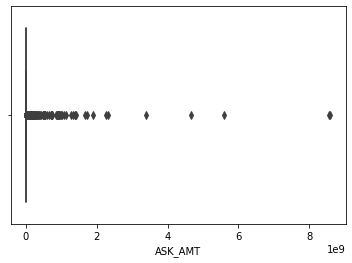

In [40]:
import seaborn as sns
sns.boxplot(application_df['ASK_AMT'])

In [41]:
import numpy as np
print(np.where(application_df['ASK_AMT']>4))

(array([    0,     1,     2, ..., 34296, 34297, 34298], dtype=int64),)


In [42]:
# Position of the Outlier
print(np.where((application_df['ASK_AMT']>4) & (application_df['ASK_AMT']>9)))

(array([    0,     1,     2, ..., 34296, 34297, 34298], dtype=int64),)


In [43]:
#Zscore = (data_point -mean) / std. deviation
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(application_df['ASK_AMT']))
print(z)


0        0.031725
1        0.030536
2        0.031725
3        0.031706
4        0.030146
           ...   
34294    0.031725
34295    0.031725
34296    0.031725
34297    0.031725
34298    0.387138
Name: ASK_AMT, Length: 34299, dtype: float64


In [44]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([  677,   773,   871,  2328, 11126, 11822, 11824, 12344, 20103,
       21157, 21161, 21186, 21482, 21558, 21633, 21640, 21641, 21646,
       22494, 24101, 24795, 24796, 24799, 24800, 24947, 24955, 25509,
       25563, 26098, 26430, 29477, 29489, 30099, 30121, 31337, 31343,
       32385, 32635, 32944, 33027, 33162, 33175, 33256, 33359, 33678,
       33695, 33717, 33718, 33720, 33760, 33810, 34222, 34237],
      dtype=int64),)


In [45]:
# IQR
Q1 = np.percentile(application_df['ASK_AMT'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(application_df['ASK_AMT'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [46]:
Q1

5000.0

In [47]:
Q3

7742.0

In [48]:
IQR

2742.0

In [49]:
df_filtered = application_df[(application_df["ASK_AMT"] >=5000) & (application_df["ASK_AMT"] >7800 )]

In [50]:
df_filtered

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1,31452,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,7508025,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,94389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34280,1,401661,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34281,1,56261,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34284,1,3384856,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
34289,1,20197,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


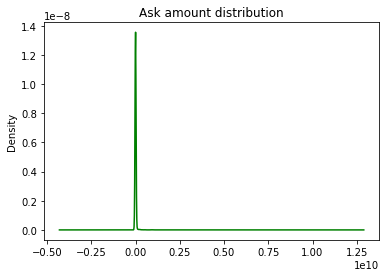

In [51]:
import matplotlib.pyplot as plt
df_filtered["ASK_AMT"].plot.kde(color='green')
plt.title('Ask amount distribution')
plt.show()

In [52]:
# Split our preprocessed data into our features and target arrays
y = df_filtered["IS_SUCCESSFUL"].values #target
X = df_filtered.drop(["IS_SUCCESSFUL"],axis=1).values # all features 

In [53]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [54]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [55]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                450       
                                                                 
 dense_7 (Dense)             (None, 8)                 88        
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 547
Trainable params: 547
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
201/201 [==============================] - 0s 1ms/step - loss: 0.6654 - accuracy: 0.6241
Epoch 2/100
201/201 [==============================] - 0s 746us/step - loss: 0.6218 - accuracy: 0.6678
Epoch 3/100
201/201 [==============================] - 0s 733us/step - loss: 0.6139 - accuracy: 0.6711
Epoch 4/100
201/201 [==============================] - 0s 696us/step - loss: 0.6107 - accuracy: 0.6751
Epoch 5/100
201/201 [==============================] - 0s 703us/step - loss: 0.6081 - accuracy: 0.6771
Epoch 6/100
201/201 [==============================] - 0s 728us/step - loss: 0.6064 - accuracy: 0.6789
Epoch 7/100
201/201 [==============================] - 0s 723us/step - loss: 0.6046 - accuracy: 0.6790
Epoch 8/100
201/201 [==============================] - 0s 733us/step - loss: 0.6031 - accuracy: 0.6800
Epoch 9/100
201/201 [==============================] - 0s 728us/step - loss: 0.6016 - accuracy: 0.6832
Epoch 10/100
201/201 [==============================] - 0s 739us/step - los

201/201 [==============================] - 0s 688us/step - loss: 0.5829 - accuracy: 0.6954
Epoch 80/100
201/201 [==============================] - 0s 663us/step - loss: 0.5831 - accuracy: 0.6966
Epoch 81/100
201/201 [==============================] - 0s 738us/step - loss: 0.5828 - accuracy: 0.6958
Epoch 82/100
201/201 [==============================] - 0s 827us/step - loss: 0.5829 - accuracy: 0.6957
Epoch 83/100
201/201 [==============================] - 0s 807us/step - loss: 0.5831 - accuracy: 0.6932
Epoch 84/100
201/201 [==============================] - 0s 777us/step - loss: 0.5827 - accuracy: 0.6947
Epoch 85/100
201/201 [==============================] - 0s 703us/step - loss: 0.5828 - accuracy: 0.6919
Epoch 86/100
201/201 [==============================] - 0s 688us/step - loss: 0.5832 - accuracy: 0.6905
Epoch 87/100
201/201 [==============================] - 0s 693us/step - loss: 0.5825 - accuracy: 0.6963
Epoch 88/100
201/201 [==============================] - 0s 713us/step - loss:

In [58]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

67/67 - 0s - loss: 0.6065 - accuracy: 0.6811 - 106ms/epoch - 2ms/step
Loss: 0.606521487236023, Accuracy: 0.6811391115188599


#usually when we remove outliers the model's accuracy increases ,however here it did not because we need to add more data when we removed outliers we lost some data we lost training data .